In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:

# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from pathlib import Path
import os
import PIL
import pickle
import cv2
import PIL.Image
from skimage import io
from skimage.transform import resize
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
cd /content/drive/MyDrive/Deep_learning_assignments

/content/drive/MyDrive/Deep_learning_assignments


In [10]:
# Loading Data And Defining Features And Labels
directory = Path("./ML_Datasets-main/flowers")

flowers = []
features = []
labels = []

# Iterating Over Directory To Extract Sub Directories
for dir in directory.iterdir():
  flowers.append(dir.name)
  print(dir.name)
# Iterating Over Sub Directories To Extract Lables
  for imgpath in dir.iterdir():
    if imgpath.name.endswith("jpg"):
      labels.append(dir.name)
      imgarr = cv2.imread(str(imgpath), cv2.IMREAD_COLOR)
      imgarr = cv2.resize(imgarr, (150,150))
      features.append(imgarr)

dandelion
tulip
rose


KeyboardInterrupt: ignored

In [ ]:
features[5]
labels[5]

'dandelion'

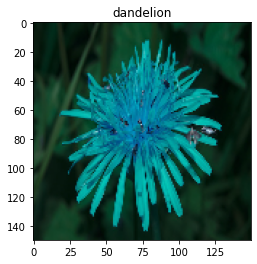

In [ ]:
# Visualizing A Flower
plt.imshow(features[1010])
plt.title(labels[1010])
plt.show()

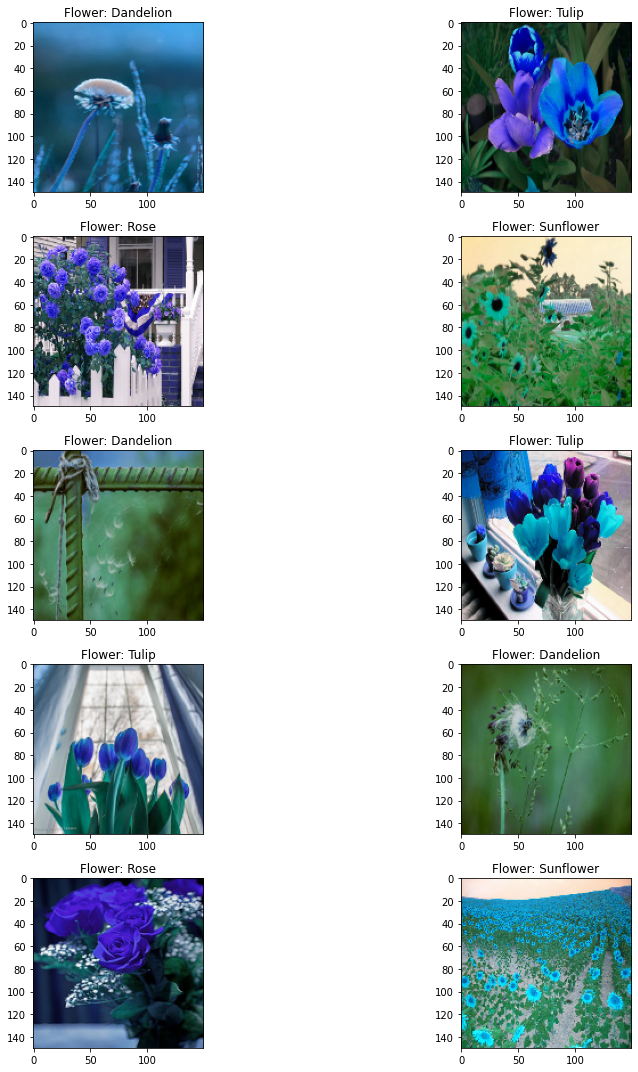

In [ ]:
# Visualizing Some Flowers Randomly
import random
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(labels))
        ax[i,j].imshow(features[l])
        ax[i,j].set_title('Flower: '+labels[l].title())
plt.tight_layout()

In [ ]:
# One Hot Encoding Labels
labels = LabelEncoder().fit_transform(labels)
labels = to_categorical(labels)
labels

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# Normalizing Features
features = np.array(features)
features = features / 255

In [ ]:
# Splitting Into Training And Testing Data: As Per Requirement Splitting Data Into 60 % Training Data And 40 % Testing Data
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.4, random_state = 42)

In [ ]:
# Printing Shape Of Tarining And Testing Data
print(f"Shape Of Train Data: {train_data.shape}")
print(f"Shape of Train Labels: {train_labels.shape}")
print(f"Shape of Test Data: {test_data.shape}")
print(f"Shape of Test Labels: {test_labels.shape}")

Shape Of Train Data: (2593, 150, 150, 3)
Shape of Train Labels: (2593, 5)
Shape of Test Data: (1730, 150, 150, 3)
Shape of Test Labels: (1730, 5)


In [ ]:
# Setting Random Seeds
import random as rn
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [ ]:
# Making Base Model
model = Sequential()
model.add(Conv2D(32, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Conv2D(96, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
flatten (Flatten)            (None, 31104)             0

In [ ]:
# Using A LR Annealer
from tensorflow.keras.callbacks import ReduceLROnPlateau
red_lr = ReduceLROnPlateau(monitor = 'accuracy', patience = 3, verbose = 1, factor = 0.1)

In [ ]:
# Augmenting Data So That We May Not Face Overfitting Problem
DataGen = ImageDataGenerator(
        featurewise_center = False,  
        samplewise_center = False,  
        featurewise_std_normalization = False,  
        samplewise_std_normalization = False,  
        zca_whitening = False,  
        rotation_range = 10, 
        zoom_range = 0.1,  
        width_shift_range = 0.2,  
        height_shift_range = 0.2,  
        horizontal_flip = True,  
        vertical_flip = False)  

DataGen.fit(train_data)

In [ ]:
# Compilation Step
model.compile(optimizer=Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting Model On 80 Epochs
history = model.fit_generator(DataGen.flow(train_data,train_labels, batch_size=128),
                              epochs = 80,
                              verbose = 1, steps_per_epoch=train_data.shape[0] // 128)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/80
20/20 [==============================] - 121s 6s/step - loss: 1.7960 - accuracy: 0.2871
Epoch 2/80
20/20 [==============================] - 115s 6s/step - loss: 1.2038 - accuracy: 0.4939
Epoch 3/80
20/20 [==============================] - 114s 6s/step - loss: 1.1340 - accuracy: 0.5356
Epoch 4/80
20/20 [==============================] - 115s 6s/step - loss: 1.0620 - accuracy: 0.5746
Epoch 5/80
20/20 [==============================] - 114s 6s/step - loss: 1.0348 - accuracy: 0.5741
Epoch 6/80
20/20 [==============================] - 114s 6s/step - loss: 0.9992 - accuracy: 0.6050
Epoch 7/80
20/20 [==============================] - 117s 6s/step - loss: 0.9346 - accuracy: 0.6428
Epoch 8/80
20/20 [==============================] - 114s 6s/step - loss: 0.8745 - accuracy: 0.6562
Epoch 9/80
20/20 [==============================] - 115s 6s/step - loss: 0.8892 - accuracy: 0.6574
Epoch 10/80
20/20 [==============================] - 114s 6s/step - loss: 0.8147 - accuracy: 0.6794
Epoch 11/

In [ ]:
# Plotting Model Loss On Training Data
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss On Training Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Loss', 'Accuracy'])
plt.grid()
plt.show()

NameError: ignored

<Figure size 720x720 with 0 Axes>